## Pandas Homework

### TASK 1
**В файлике train.csv содержится информация о числе ридов с каждым из 4-ёх нуклеотидов по разным позициям (колонки A, T, G, C)). Постройте гистограмму распределения этих чисел
По x должны идти позиции (pos), а по y - частота для каждой из букв (stacked barplot)
(7 баллов)**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Serfentum/bf_course/master/14.pandas/train.csv')

In [3]:
df_train.head()

,pos,reads_all,matches,mismatches,deletions,insertions,A,C,T,G,A_fraction,T_fraction,G_fraction,C_fraction
0,279,8045,32,7972,46,8,7911.0,54.0,11.0,NaN,0.983503,0.000815,NaN,0.006896
1,280,8045,7995,48,19,9,NaN,16.0,13.0,19.0,NaN,0.001355,0.002392,0.001914
2,281,8045,7983,50,16,5,NaN,24.0,4.0,24.0,NaN,0.000639,0.002875,0.002310
3,282,8049,7510,505,33,65,105.0,11.0,395.0,NaN,0.012750,0.049096,NaN,0.000919
4,283,8042,7786,155,115,62,46.0,NaN,93.0,31.0,0.004960,0.010992,0.003186,NaN


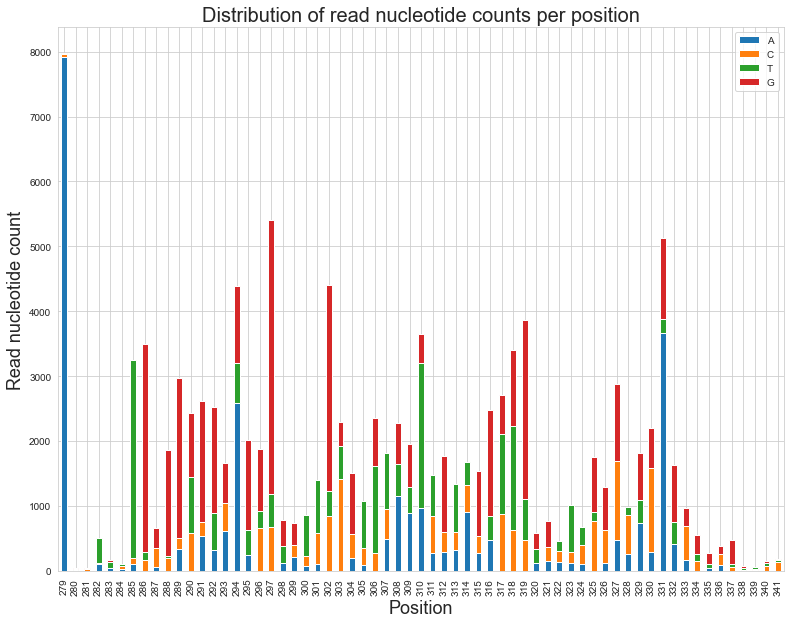

In [4]:
# without normalization
df_train.set_index('pos')[['A', 'C', 'T', 'G']].plot.bar(figsize=(13,10),stacked=True)
plt.ylabel("Read nucleotide count", fontdict = {'fontsize' : 18})
plt.xlabel("Position", fontdict = {'fontsize' : 18})
plt.title("Distribution of read nucleotide counts per position", fontdict = {'fontsize' : 20})
plt.xticks(fontsize=10)
plt.show()

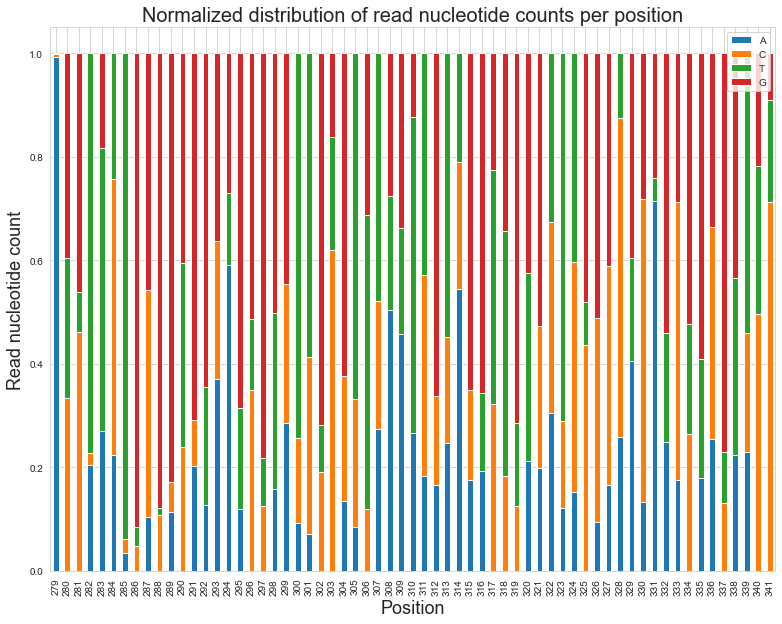

In [5]:
# with normalization

df_train.set_index('pos')[['A', 'C', 'T', 'G']].divide(
df_train.set_index('pos')[['A', 'C', 'T', 'G']].sum(axis=1), axis=0
)[['A', 'C', 'T', 'G']].plot.bar(figsize=(13,10),stacked=True)

plt.ylabel("Read nucleotide count", fontdict = {'fontsize' : 18})
plt.xlabel("Position", fontdict = {'fontsize' : 18})
plt.title("Normalized distribution of read nucleotide counts per position", fontdict = {'fontsize' : 20})
plt.xticks(fontsize=10)
plt.show()

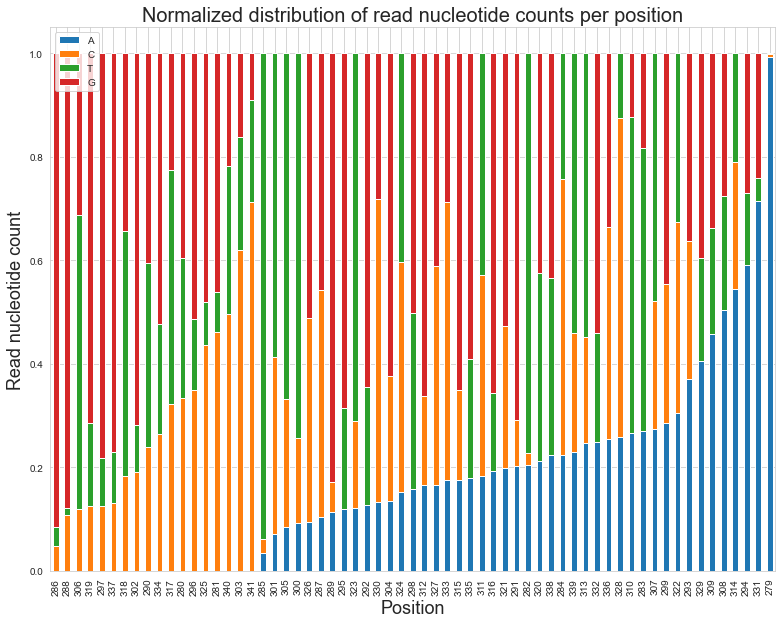

In [6]:
# with normalization and sorting positions by frequency

df_train.set_index('pos')[['A', 'C', 'T', 'G']].divide(
df_train.set_index('pos')[['A', 'C', 'T', 'G']].sum(axis=1), axis=0
)[['A', 'C', 'T', 'G']].fillna(0).sort_values(['A', 'C', 'T', 'G']).plot.bar(figsize=(13,10),stacked=True)

plt.ylabel("Read nucleotide count", fontdict = {'fontsize' : 18})
plt.xlabel("Position", fontdict = {'fontsize' : 18})
plt.title("Normalized distribution of read nucleotide counts per position", fontdict = {'fontsize' : 20})
plt.xticks(fontsize=10)
plt.show()

### TASK 2
**Сохраните в файл train_part.csv следующую часть из файла train.csv:
строки, где matches больше чем среднее\
колонки pos, reads_all, mismatches, deletions, insertions\
Ссылка на файл
https://raw.githubusercontent.com/Serfentum/bf_course/master/14.pandas/train.csv
(5 баллов)**

In [7]:
df_train.query('matches > matches.mean()')[['pos', 'reads_all', 'mismatches', 'deletions', 'insertions']].to_csv('./train_part.csv', index=False)

In [8]:
pd.read_csv('./train_part.csv').head()

,pos,reads_all,mismatches,deletions,insertions
0,280,8045,48,19,9
1,281,8045,50,16,5
2,282,8049,505,33,65
3,283,8042,155,115,62
4,284,8048,104,864,241


### TASK 3
**Проведите Explorative Data Analysis знаменитого датасэта титаника (или какого-нибудь другого, если вам скушно с Титаником). Как минимум нужны корреляции, графики распределений (25 баллов)**

In [9]:
df_titanic = pd.read_csv('titanic/train.csv')

In [10]:
# take a glance at the data
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
# how many rows (observations) and columns do we have
df_titanic.shape

(891, 12)

We have data for 891 passenger

In [13]:
# Find the type of data
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
# Find the type of data and presence of NAs
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
# Number of unique values
df_titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Data from several columns (`Survived `, `Pclass`, `Name`, `Sex`, and `Embarked`) could be categorical.\
Some columns probably contain missing values

In [16]:
# Check for missing values
df_titanic.isnull().values.any()

True

In [17]:
# Find the number of missing values in each column (if any)
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values were found in columns `Age` (numerical) and `Cabin` (categorical) and `Embarked` (categorical).

In [18]:
# Find the fraction of missing values in each column
for i in range(df_titanic.shape[1]):
    print(f"{df_titanic.columns[i]} -- {df_titanic.isnull().sum().divide(df_titanic.shape[0]).values[i] * 100:.2f}%")

PassengerId -- 0.00%
Survived -- 0.00%
Pclass -- 0.00%
Name -- 0.00%
Sex -- 0.00%
Age -- 19.87%
SibSp -- 0.00%
Parch -- 0.00%
Ticket -- 0.00%
Fare -- 0.00%
Cabin -- 77.10%
Embarked -- 0.22%


The data is missing 77.1 % of `Cabin` values.

`Age` lack about 20 % of values. 

In [19]:
# basics statistics of numerical variables:
df_titanic.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We could consider only `Age` and `Fare` as numerical
Average age of passengers is 29.69.\
Std is about 14.53. So most of passangers were of age in the range (29.69-14.53) to (29.69+14.53).\
50% of the passengers have age less than 28 years  

**Description of some variables (from Kaggle)**:

`pclass`: A proxy for socio-economic status (SES)\
1st = Upper\
2nd = Middle\
3rd = Lower

`age`: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

`sibsp`: The dataset defines family relations in this way...\
Sibling = brother, sister, stepbrother, stepsister\
Spouse = husband, wife (mistresses and fiancés were ignored)

`parch`: The dataset defines family relations in this way...\
Parent = mother, father\
Child = daughter, son, stepdaughter, stepson\
Some children travelled only with a nanny, therefore parch=0 for them.

`embarked`: Port of Embarkation\
C = Cherbourg, Q = Queenstown, S = Southampton

`fare`: Passenger fare



The follwong data can be dropped from the analysis:\
`PassengerId`, `Name`, `Ticket`, `Cabin`: they are difficult to be categorized and are not expected to contribute much to the outcome.\

Let's take a look at `Survived`, `Pclass`, `Age`, `Sex`, `Embarked` data.

**Survived data**

In [20]:
df_titanic["Old_Survived"] = df_titanic["Survived"]
df_titanic["Survived"] = df_titanic["Survived"].map({1:"yes" , 0 :"no"})
df_titanic["Survived"].value_counts()

no     549
yes    342
Name: Survived, dtype: int64

Out of 891 passengers, 549 could not survive the disaster and 342 survived.

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

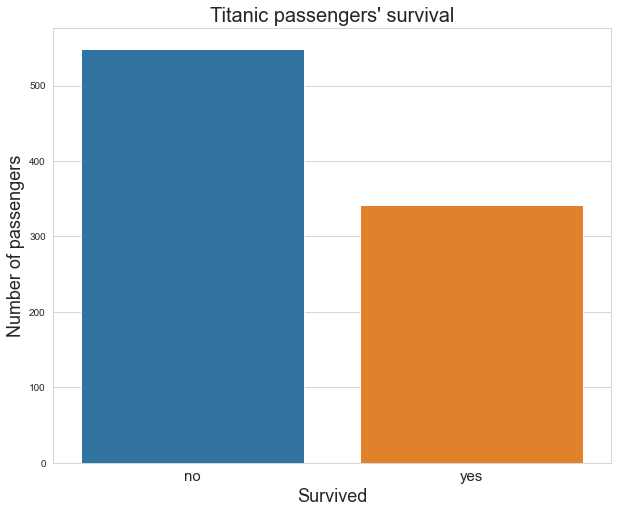

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(x = df_titanic["Survived"], data=df_titanic)
plt.ylabel("Number of passengers", fontdict = {'fontsize' : 18})
plt.xlabel("Survived", fontdict = {'fontsize' : 18})
plt.title("Titanic passengers' survival", fontdict = {'fontsize' : 20})
plt.xticks(fontsize=15)

Most of passengers could not survive the disatser

 **Pclass vs Survived**

In [22]:
# Modify Pclass column values
df_titanic['Old_Pclass'] = df_titanic["Pclass"]
df_titanic["Pclass"] = df_titanic["Pclass"].map({1:"Upper" , 2 :"Middle", 3: "Lower"})

(array([0, 1, 2]),
 [Text(0, 0, 'Lower'), Text(1, 0, 'Upper'), Text(2, 0, 'Middle')])

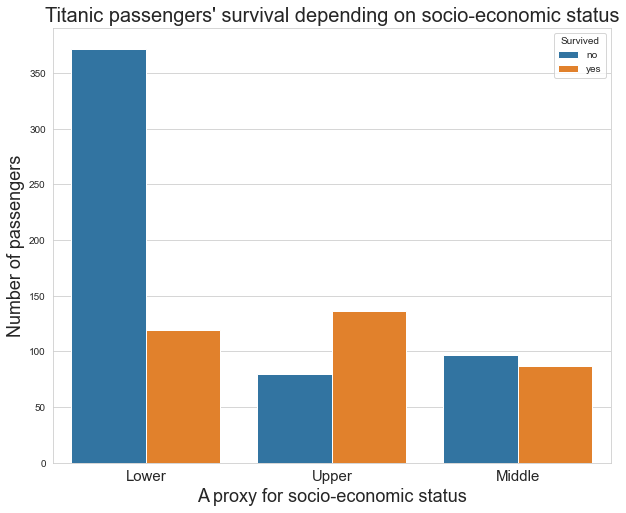

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(x = df_titanic["Pclass"],hue = df_titanic["Survived"],data = df_titanic)
plt.ylabel("Number of passengers", fontdict = {'fontsize' : 18})
plt.xlabel("A proxy for socio-economic status", fontdict = {'fontsize' : 18})
plt.title("Titanic passengers' survival depending on socio-economic status", fontdict = {'fontsize' : 20})
plt.xticks(fontsize=15)

Passengers of the lower socio-economic status (SES) mostly died.\
In the 2nd class, approximately equal number of passengers who survived and who did not.\
The majority of passengers who travelled in the 1st class survived the disaster rather than died.  
It seems that the higher SES of the passenger, the more chances they had to survive. 

**Sex vs Survived**

(array([0, 1]), [Text(0, 0, 'male'), Text(1, 0, 'female')])

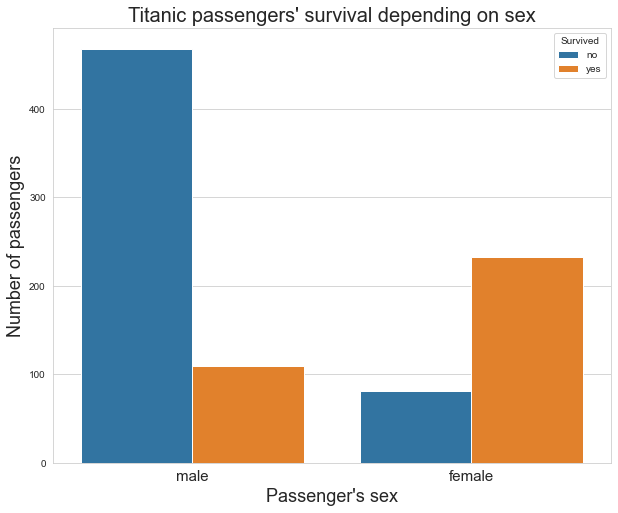

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(x = df_titanic["Sex"], hue = df_titanic["Survived"],data = df_titanic)
plt.ylabel("Number of passengers", fontdict = {'fontsize' : 18})
plt.xlabel("Passenger's sex", fontdict = {'fontsize' : 18})
plt.title("Titanic passengers' survival depending on sex", fontdict = {'fontsize' : 20})
plt.xticks(fontsize=15)


Most of male passengers died while the majority of female survived.\
Probably, female passengers were the first who they tried to rescue

**Age data**

(array([0, 1]), [Text(0, 0, 'male'), Text(1, 0, 'female')])

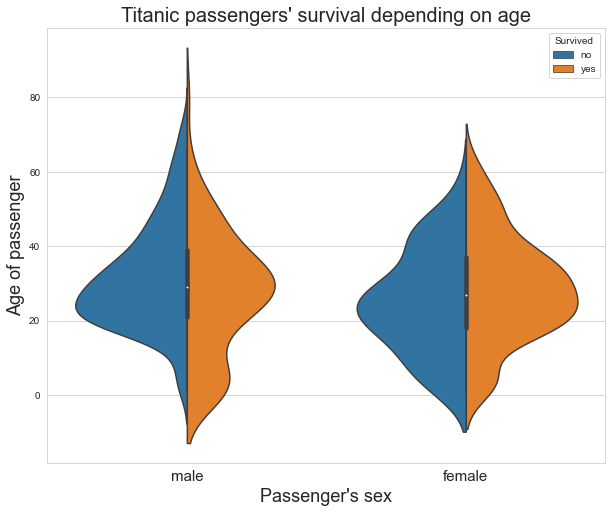

In [25]:
plt.figure(figsize=(10,8))
sns.violinplot(x ="Sex", y ="Age", hue ="Survived", data = df_titanic, split = True) 
plt.ylabel("Age of passenger", fontdict = {'fontsize' : 18})
plt.xlabel("Passenger's sex", fontdict = {'fontsize' : 18})
plt.title("Titanic passengers' survival depending on age", fontdict = {'fontsize' : 20})
plt.xticks(fontsize=15)

Children were more tend to survive than die.\
The survival rate is high for women in the age of 20-50.\
Men had less chances to survive than women; as their age increased, the less survival we observe. 

**Embarked data**

In [26]:
df_titanic['Embarked'] = df_titanic['Embarked'].map({'C':"Cherbourg" , 'Q' :"Queenstown", 'S': "Southampton"})

Text(0.5, 0.98, "Titanic passengers' survival \ndepending on port of embarkation and socio-economic status")

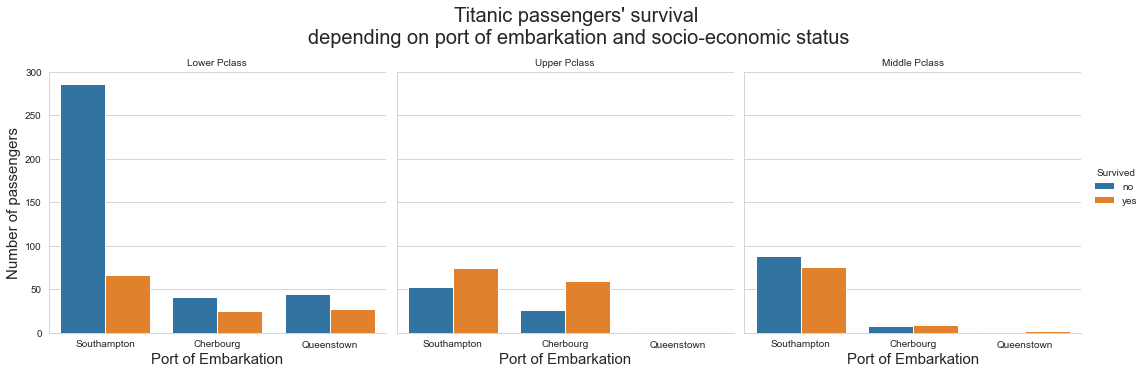

In [27]:
g = sns.catplot(x='Embarked', hue='Survived',kind='count', col='Pclass', data=df_titanic) 
g.set_axis_labels("Port of Embarkation", "Number of passengers", fontsize=15)
g.set_titles("{col_name} {col_var}")
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Titanic passengers' survival \ndepending on port of embarkation and socio-economic status",fontsize=20)

Most passengers were embarked from Southampton\
Most passengers embarked from Queenstown belonged to the lower Pclass.


**Correlation Matrix**

Let's analyze the following variables: `Survived`, `Sex`, `Age`, `Pclass`, and `Fare`

In [28]:
# Include Sex data into the analysis by modifying the type of data
df_titanic['New_Sex'] = df_titanic['Sex'].map({'female': 1, 'male': 0})
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Old_Survived,Old_Pclass,New_Sex
0,1,no,Lower,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,0,3,0
1,2,yes,Upper,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,1,1,1
2,3,yes,Lower,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,1,3,1
3,4,yes,Upper,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,1,1,1
4,5,no,Lower,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,0,3,0


In [29]:
# First consider correlation matrix in case of droping all rows with missing values

corr_matrix1 = df_titanic[['Old_Survived', 'New_Sex', 'Age', 'Old_Pclass', 'Fare']].dropna().corr()
corr_matrix1

,Old_Survived,New_Sex,Age,Old_Pclass,Fare
Old_Survived,1.000000,0.538826,-0.077221,-0.359653,0.268189
New_Sex,0.538826,1.000000,-0.093254,-0.155460,0.184994
Age,-0.077221,-0.093254,1.000000,-0.369226,0.096067
Old_Pclass,-0.359653,-0.155460,-0.369226,1.000000,-0.554182
Fare,0.268189,0.184994,0.096067,-0.554182,1.000000


Text(0.5, 1.0, 'Correlation matrix for the Titanic data')

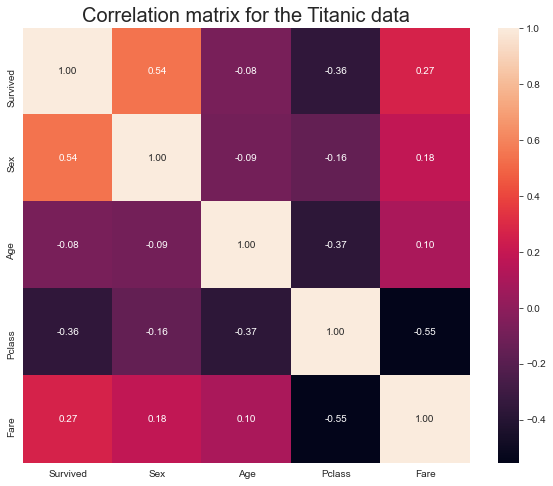

In [30]:
y_axis_labels = ['Survived', 'Sex', 'Age','Pclass', 'Fare']
x_axis_labels = y_axis_labels
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix1, annot=True, fmt =".2f", yticklabels=y_axis_labels, xticklabels=x_axis_labels)

plt.title("Correlation matrix for the Titanic data", fontdict = {'fontsize' : 20})

`Survived` correlates positively with `Fare` (the higher `Fare` was, the more chances the passenger had) and `Sex` (women had higher survival rate) and negatively with the `Age` (the younger passenger was, the more chances to survive the passenger had).

`Fare` correlaties with `P-class` negatively meaning that high `Fare` corresponded to `lower` Pclass (or higher socio-economic status). 

`Age` correlated with `P-class` negatively.

These observations support results obtained from some plots above.


We will obtain similar reasult if we replace missing age values with the mean age:

In [31]:
# Correlation matrix withput dropping missing values
# Replace missing age values with mean values

df_titanic['New_Age'] = df_titanic['Age'].fillna(df_titanic['Age'].mean())
corr_matrix2 = df_titanic[['Old_Survived', 'New_Sex', 'New_Age', 'Old_Pclass', 'Fare']].corr()
corr_matrix2

,Old_Survived,New_Sex,New_Age,Old_Pclass,Fare
Old_Survived,1.000000,0.543351,-0.069809,-0.338481,0.257307
New_Sex,0.543351,1.000000,-0.084153,-0.131900,0.182333
New_Age,-0.069809,-0.084153,1.000000,-0.331339,0.091566
Old_Pclass,-0.338481,-0.131900,-0.331339,1.000000,-0.549500
Fare,0.257307,0.182333,0.091566,-0.549500,1.000000


Text(0.5, 1.0, 'Correlation matrix for the Titanic data')

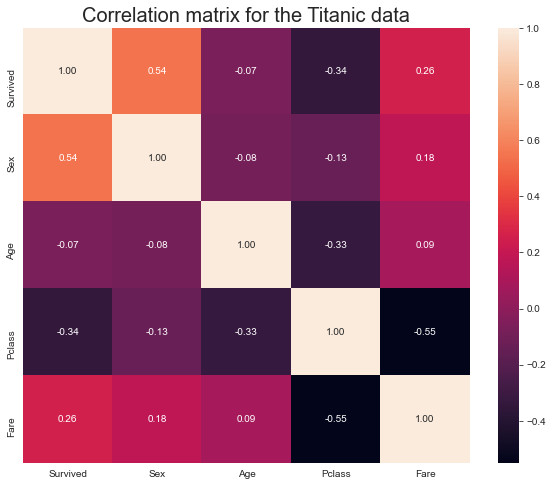

In [32]:
y_axis_labels = ['Survived', 'Sex', 'Age','Pclass', 'Fare']
x_axis_labels = y_axis_labels
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix2, annot=True, fmt =".2f", yticklabels=y_axis_labels, xticklabels=x_axis_labels)

plt.title("Correlation matrix for the Titanic data", fontdict = {'fontsize' : 20})